In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Week 6 Notes
### Numerical Integration Example - Simulating the Solar System

Today we will look at how we can use numerical integration to integrate the solar system. Before we begin that, I will do a quick review of the simple 1-Planet integration we did last time and introduce the leapfrog method for more accurate integration. We will then use both the Euler method and the Leapfrog Method to calculate the orbits of the solar system. 

For this you will the the file: "solar_sys.txt" in the same directory as your Jupyter notebook. Before we begin, please download the file from the Github. You can do this in any of 3 ways:

1. Open a terminal in Syzygy and type: ``git clone https://github.com/fhorrobin/UTSC-Python-W2018.git`` A new folder should appear in your Syzygy profile. Click on this folder and start your new notebook here.

2. Go to the Github, click on the file to view it and then right click the page and choose "Save As". Save the file to your desktop and then upload it into your Syzygy profile.

3. Open the file from the Github as in (1). Open a new text file in Syzygy. Copy and pase the text from the file into your new text file and save it with the name "solar_sys.txt".

Recall from last week that the equations of motion we want to consider are:

$$ \vec F = -\frac{GMm}{r^2} \frac{\vec x}{|r|} $$

$$ \vec F = m \vec a$$

$$ \ddot x = \dot v_x(t) = \frac{-GM}{r^2}\frac{x}{|r|} $$

$$ \ddot y = \dot v_y(t) = \frac{-GM}{r^2}\frac{y}{|r|} $$

We will solve these by using a numerical integrator. First, we consider a simple example of a single planet orbiting a fixed star.

In [28]:
def rhs(x):
    GM = 1.
    r2 = x[0]*x[0] + x[1]*x[1]
    return [-GM*x[0]/(r2*np.sqrt(r2)), -GM*x[1]/(r2*np.sqrt(r2))]

def euler_step(x, v, rhs, dt):
    # Calculate a
    a = rhs(x)
    
    # First push position
    x[0] += v[0]*dt
    x[1] += v[1]*dt
    
    # Now kick the velocity
    v[0] += a[0]*dt
    v[1] += a[1]*dt

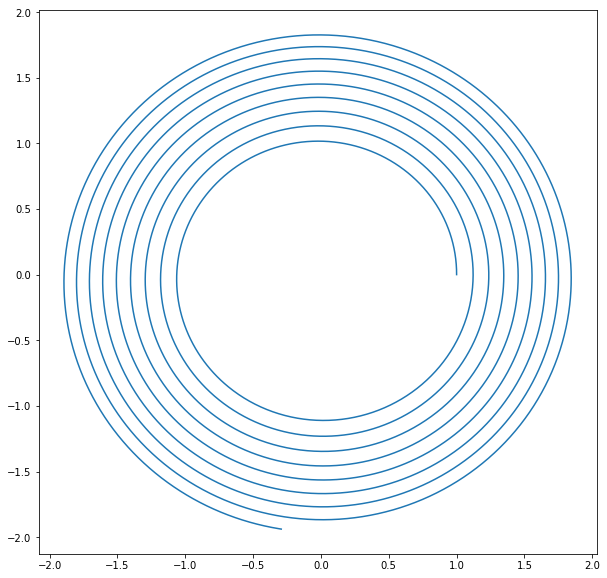

In [29]:
x_euler = []
y_euler = []

t_euler = []

x = [1., 0.]
v = [0., 1.]
dt = 0.01
t = 0.

while t<= 100:
    x_euler.append(x[0])
    y_euler.append(x[1])
    t_euler.append(t)
    
    euler_step(x, v, rhs, dt)
    t += dt
    
fig, ax = plt.subplots(1,1, figsize=(10, 10))
ax.plot(x_euler, y_euler)

Now let's try the eapfrog method: Let F(x) refer to a calculation of a. The leapfrog method proceeds as follows:

$$ \vec x = \vec v \frac{\Delta t}{2} $$

$$ \vec a = F(\vec x) $$

$$ \vec v = \vec a \Delta t $$

$$ \vec x = \vec v \frac{\Delta t}{2} $$

In [30]:
def leapfrog_step(x, v, rhs, dt):
    x[0] += v[0] * dt/2
    x[1] += v[1] * dt/2
    
    a = rhs(x)
    
    v[0] += a[0] * dt
    v[1] += a[1] * dt
    
    x[0] += v[0] * dt/2
    x[1] += v[1] * dt/2

In [43]:
x_lf = []
y_lf = []

t_lf = []

x = [1., 0.]
v = [0., 1.]
dt = 0.01
t = 0.

while t<= 200:
    x_lf.append(x[0])
    y_lf.append(x[1])
    t_lf.append(t)
    
    leapfrog_step(x, v, rhs, dt)
    t += dt

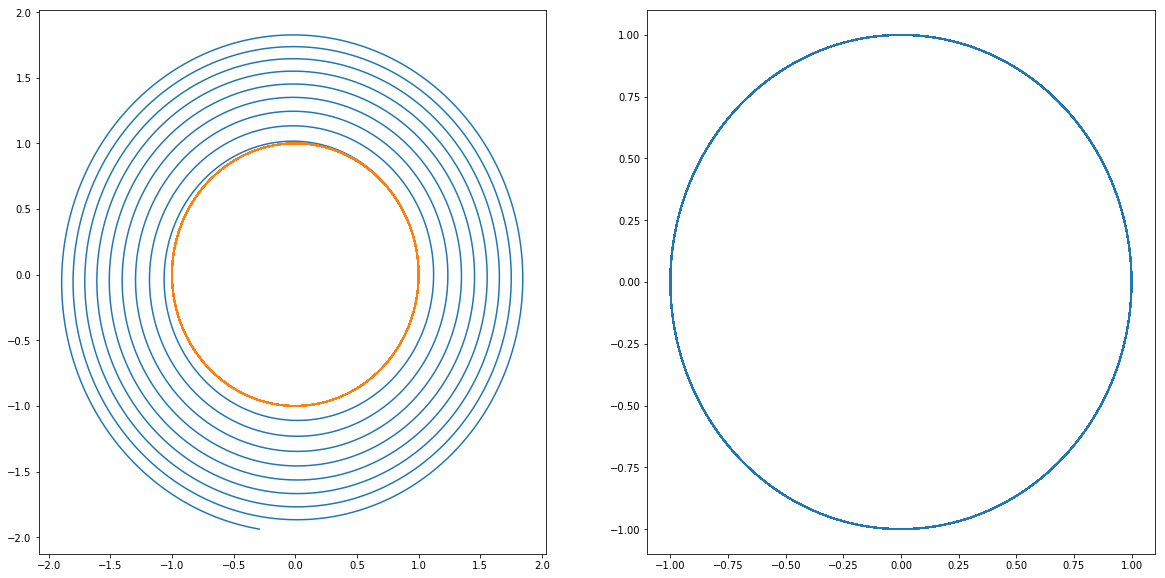

In [45]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(x_euler, y_euler)
ax[0].plot(x_lf, y_lf)

ax[1].plot(x_lf, y_lf)

Now let's consider how we could change this if we wanted to actually integrate the solar system (or some other system with many bodies).

We will actually integrate the solar system for this example. First, I have prepared a text file with data from NASA horizon on the location of the planets as well as masses and the velocities on March 4th 2004.

We will read the data in from the file called solar_sys.txt. 

There are 8 columns:
name, mass, x, y, z, vx, vy, vz

We will then solve the system of equations as follows:

$$ \vec F_{ij} = -\frac{Gm_im_j}{|\vec r_{ij}|^2} \cdot \frac{\vec r_{ij}}{|\vec r_{ij}|} $$

$$ \vec F_i = -\sum_{j=0; j \ne i}^{N-1} \frac{Gm_im_j}{|\vec r_{ij}|^2} \cdot \frac{\vec r_{ij}}{|\vec r_{ij}|}$$

$$ \ddot r = a = -\sum_{j=0; j \ne i}^{N-1} \frac{Gm_j}{|\vec r_{ij}|^2} \cdot \frac{\vec r_{ij}}{|\vec r_{ij}|}$$

So we will solve the same equation but this time we need to sum over all the bodies. Let's try it.

In [23]:
# First we will read the data for the initial positions, masses and velocities of the solar system

df = pd.read_csv("solar_sys.txt", sep=" ")
df
names = np.array(df.name)
mi = np.array(df.mass)
xi = np.array([[df.x[i], df.y[i], df.z[i]] for i in range(len(df.x))])
vi = np.array([[df.vx[i], df.vy[i], df.vz[i]] for i in range(len(df.vx))])

In [24]:
names, mi, xi, vi

(array(['sun', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn',
        'uranus', 'neptune'], dtype=object),
 array([1.988544e+30, 3.302000e+23, 4.868500e+24, 5.972190e+24,
        6.418500e+23, 1.898130e+27, 5.683190e+26, 8.681030e+25,
        1.024100e+26]),
 array([[ 4.91403348e+04, -3.63271559e+05, -1.04914856e+04],
        [ 5.41942339e+07, -1.62548742e+07, -6.23196822e+06],
        [-2.25679871e+07,  1.04656127e+08,  2.76022302e+06],
        [-1.41828768e+08,  4.12688472e+07, -1.12528526e+04],
        [ 2.40827903e+07,  2.31129027e+08,  4.26163147e+06],
        [-7.77841420e+08,  2.24451870e+08,  1.64744173e+07],
        [-2.81880540e+08,  1.32147966e+09, -1.17746987e+07],
        [ 2.66827506e+09, -1.36820720e+09, -3.96545661e+07],
        [ 3.06896488e+09, -3.29050877e+09, -2.96549289e+06]]),
 array([[ 6.24251651e-03,  1.16326079e-02, -2.47537467e-04],
        [ 4.38105748e+00,  4.89112014e+01,  3.59309753e+00],
        [-3.43140139e+01, -7.71000645e+00,  1.87506739e+0

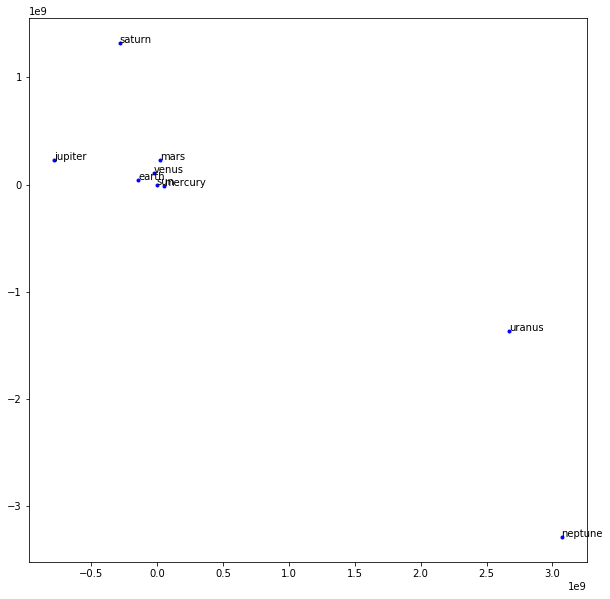

In [25]:
# Now let's plot the initial positions with labels to test it.
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
for i in range(len(xi)):
    plt.plot(xi[i][0], xi[i][1], 'b.')
    plt.annotate(names[i],xy=(xi[i][0],xi[i][1]))

Now we have the initial positions. Let's try integrating them first using Euler. It is the same process as before but now we must integrate every body with every other body. Let's define a more general euler step for 2 bodies separated by r.

In [13]:
def rhs(x1, x2, m2):
    G = 6.67384e-20
    dx = x1[0] - x2[0]
    dy = x1[1] - x2[1]
    dz = x1[2] - x2[2]
    r2 = dx*dx + dy*dy + dz*dz
    return [-G*m2*dx/(r2*np.sqrt(r2)), -G*m2*dy/(r2*np.sqrt(r2)), -G*m2*dz/(r2*np.sqrt(r2))]

In [14]:
def euler_step(x, v, m, rhs, dt):
    N = len(x)
    x0 = x.copy()
    
    for i in range(N):
        x[i][0] += v[i][0] * dt
        x[i][1] += v[i][1] * dt
        x[i][2] += v[i][2] * dt
        
    for i in range(N):
        # Calculate the total acceleration
        ax = 0.
        ay = 0.
        az = 0.
        for j in range(N):
            if i != j:
                a = rhs(x0[i], x0[j], m[j])
                ax += a[0]
                ay += a[1]
                az += a[2]
      
        v[i][0] += ax * dt
        v[i][1] += ay * dt
        v[i][2] += az * dt

In [15]:
# Now integrate them
t = 0.
t_max = 1. * 365. * 24. * 60. * 60. # 1 year
dt = 1. * 24. * 60. * 60. # 1 day

mass = mi.copy()
x = xi.copy()
v = vi.copy()

# We will store x and y components of positions as array:
#     x1, x2, x3, x4, ... x9

x_res = []
y_res = []
t_res = []

while t<t_max:
    x_res.append([x[i][0] for i in range(len(x))])
    y_res.append([x[i][1] for i in range(len(x))])
    t_res.append(t)
    
    euler_step(x, v, mass, rhs, dt)
    t += dt

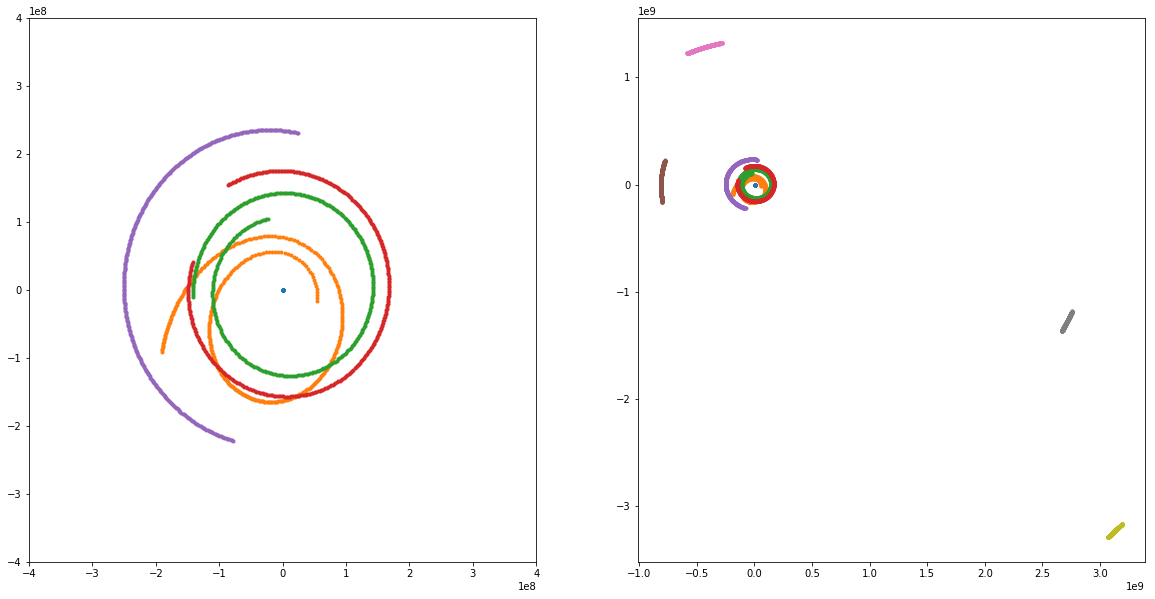

In [16]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(x_res, y_res, '.')
ax[0].set_xlim(-4e8, 4e8)
ax[0].set_ylim(-4e8, 4e8)

ax[1].plot(x_res, y_res, '.')
plt.show()

We can also try the same thing with the leapfrog method. Let's see how easy it is to change it.

In [17]:
def leapfrog_step(x, v, m, rhs, dt):
    N = len(x)
    for i in range(N):
        x[i][0] += v[i][0] * dt/2
        x[i][1] += v[i][1] * dt/2
        x[i][2] += v[i][2] * dt/2
        
    for i in range(N):
        # Calculate the total acceleration
        ax = 0.
        ay = 0.
        az = 0.
        for j in range(N):
            if i != j:
                a = rhs(x[i], x[j], m[j])
                ax += a[0]
                ay += a[1]
                az += a[2]
      
        v[i][0] += ax * dt
        v[i][1] += ay * dt
        v[i][2] += az * dt
        
    for i in range(N):
        x[i][0] += v[i][0] * dt/2
        x[i][1] += v[i][1] * dt/2
        x[i][2] += v[i][2] * dt/2

In [18]:
# Now integrate them
t = 0.
t_max = 1. * 365. * 24. * 60. * 60. # 1 year
dt = 1. * 24. * 60. * 60. # 1 day

mass = mi.copy()
x = xi.copy()
v = vi.copy()

# We will store x and y components of positions as array:
#     x1, x2, x3, x4, ... x9

x_res = []
y_res = []
t_res = []

while t<t_max:
    x_res.append([x[i][0] for i in range(len(x))])
    y_res.append([x[i][1] for i in range(len(x))])
    t_res.append(t)
    
    leapfrog_step(x, v, mass, rhs, dt)
    t += dt

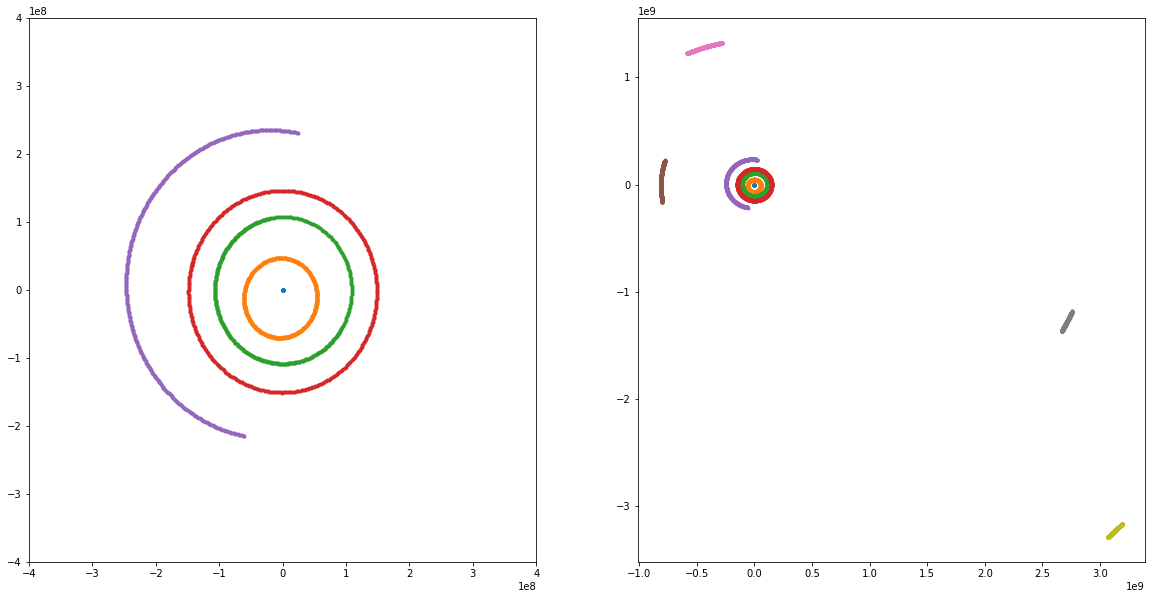

In [19]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
ax[0].plot(x_res, y_res, '.')
ax[0].set_xlim(-4e8, 4e8)
ax[0].set_ylim(-4e8, 4e8)

ax[1].plot(x_res, y_res, '.')
plt.show()